<img src="https://raw.githubusercontent.com/UCLAMAEThreads/FluidDynTools.jl/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **Introduction to Fluid Dynamics **
<hr />

# Basic planar potential flows
In this notebook we will discuss elementary potential flows. These will be the building
blocks of more complex potential flows that come later.

Remember that, by definition, all of these flows are solutions of Laplace's equation,
both for the scalar potential

$$ \nabla^2 \phi = 0$$

and the streamfunction

$$ \nabla^2 \psi = 0$$

In some cases (singularities), however, they fail to solve these equations at some points.

Also, remember the relationships of these quantities with velocity:

$$ u = \dfrac{\partial \phi}{\partial x} = \dfrac{\partial \psi}{\partial y}$$

and

$$ v = \dfrac{\partial \phi}{\partial y} = -\dfrac{\partial \psi}{\partial x}$$

In polar coordinates,

$$ u_r = \dfrac{\partial \phi}{\partial r} = \dfrac{1}{r} \dfrac{\partial \psi}{\partial \theta}$$

and

$$ u_\theta = \dfrac{1}{r} \dfrac{\partial \phi}{\partial \theta} = -\dfrac{\partial \psi}{\partial r}$$

### Set up the module

In [1]:
using FluidDynTools

In [2]:
using PotentialFlow
using ViscousFlow

In [3]:
using Plots

### Set up grids and grid data for visualizing the potential flows
To see these flows, we need to evaluate them on a grid of points. As we
discussed in the previous notebook, it is most convenient to evaluate these
using complex coordinates. So here, we will set up grids of complex coordinates
for evaluating the different flow types.

First make the grid itself

In [4]:
# grid cell size
Δx = 0.02

# set the size of a region in which to set up the flow.
xlim = (-2,2)
ylim = (-2,2)

# make the grid
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((208, 210), (104, 105), 0.02, ((-2.06, 2.06), (-2.08, 2.08)), 10)

And now we will set up a **cache**, which sets aside some memory for
useful fields in what comes next

In [5]:
cache = GridCache(g);

With this cache, we create blank streamfunction and velocity fields.
We will use these repeatedly for storing potential flow fields:

In [6]:
ψ = zeros_gridcurl(cache)
vel = zeros_gridgrad(cache);

## The basic building block flows

### The most basic: Uniform flow
First, let us inspect a uniform flow, also called a *free stream*.

$$ u = U_\infty \cos\alpha,\quad v = U_\infty \sin \alpha, \qquad \psi = U_\infty (y \cos\alpha - x \sin\alpha), \qquad \phi = U_\infty (x\cos\alpha + y \sin\alpha) $$

We can specify this with the strength of the flow. Let us set up a uniform flow with speed
equal to 1 at an angle $\alpha = 45$ degrees ($\pi/4$ radians). We will use the complex
polar notation for this, $U_\infty\mathrm{e}^{\mathrm{i}\alpha}$.

In [7]:
U∞ = 1.0  ## speed
α = π/3  ## angle in radians (60 degrees)
fs = Freestreams.Freestream(U∞*exp(im*α))

Freestream(0.5000000000000001 + 0.8660254037844386im)

Hang on... what? Did we just use complex variables? Make sure to review the notes in the
[complex variables review notebook](2.0-ComplexVariablesNotes.ipynb) if you want to know
why we would do this or if you feel uncomfortable with your complex variables knowledge...

#### Evaluation of the flow
Let's look at the streamlines of this uniform flow. Note that it seems like
we shouldn't be calling a function from the `ViscousFlow` package to evaluate
a potential flow. However, this function simply enables useful grid calculations.

In [8]:
ViscousFlow.streamfunction!(ψ,fs,cache);

Plot the streamfunction contours

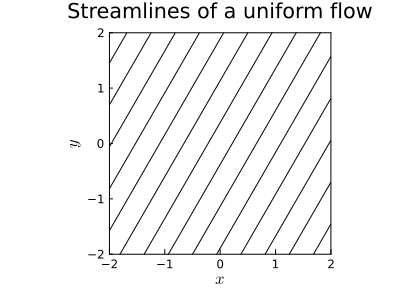

In [9]:
p = plot(ψ,cache,xlim=(-2,2),ylim=(-2,2),color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a uniform flow",show=true)

As expected, the streamlines are angled at 60 degrees.

Try some different angles to see the result.

We can also evaluate the **velocity field** of the free stream, using the
`velocity!` function. It should show the same value everywhere for both components.

In [10]:
ViscousFlow.velocity!(vel,fs,cache)

Edges{Primal, 208, 210, Float64, Vector{Float64}} data
u (in grid orientation)
209×208 Matrix{Float64}:
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.

### Basic singularity: A source
Now, let's consider a source flow
$$ u_r = Q/(2\pi r), \quad u_\theta = 0,\qquad \psi = \dfrac{Q \theta}{2\pi}, \qquad \phi = \dfrac{Q }{2\pi} \ln r$$

Let's place one at the origin with strength $Q$ equal to 1.

In [11]:
zs = 0.0+im*0.0  ## location of the source
Q = 1.0  ## strength of the source
s = Source.Point(zs,Q)

Source.Point(0.0 + 0.0im, 1.0)

Evaluate its streamfunction and plot it:

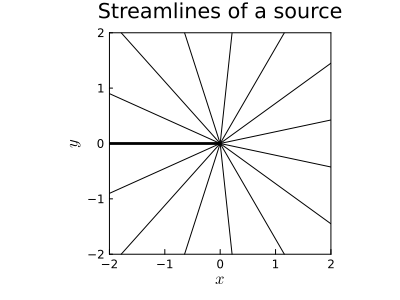

In [12]:
ViscousFlow.streamfunction!(ψ,s,cache);
p = plot(ψ,cache,xlim=(-2,2),ylim=(-2,2),color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a source")

This looks as expected, but a little strange along the $-x$ axis. Remember, the
streamfunction is multi-valued. This dark line is the **branch cut** of the streamfunction,
where it jumps from one value to another across that line.

**SIDE NOTE:** We cannot avoid the branch cut, but we can move it to a different
ray by using a rotation operator. To move it to some specified angle, we
use the `angle=` keyword argument:

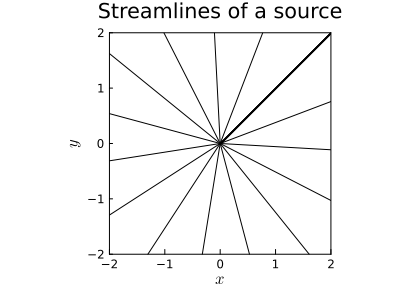

In [13]:
ViscousFlow.streamfunction!(ψ,s,cache,angle=π/4)
plot(ψ,cache,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamlines of a source")

Let's evaluate the velocity field of the source. We will be a bit complicated about
this, mostly for plotting purposes. Remember from the [field plotting notebook](1.2-PlottingFlowFields),
the u and v components are stored at different places on a staggered grid. We therefore
evaluate each component on a different set of points:

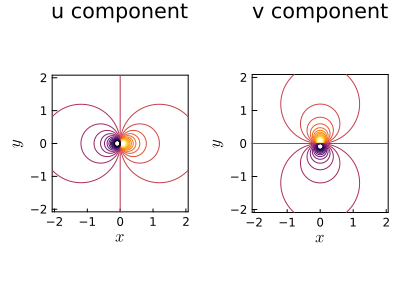

In [14]:
ViscousFlow.velocity!(vel,s,cache);
plot(
plot(vel.u,g,levels=range(-1,1,length=31),clim=(-1,1),xlabel=L"x",ylabel=L"y",title="u component"),
plot(vel.v,g,levels=range(-1,1,length=31),clim=(-1,1),xlabel=L"x",ylabel=L"y",title="v component")
)

### Another basic singularity: A point vortex
Now, let's consider a point vortex,

$$ u_r = 0, \quad u_\theta = \dfrac{\Gamma}{2\pi r},\qquad \psi = -\dfrac{\Gamma}{2\pi} \ln r, \qquad \phi = \dfrac{\Gamma \theta}{2\pi} $$

Let's place one at the origin with strength $\Gamma$ equal to 1.

In [15]:
zv = 0.0+im*0.0  # location of the vortex
Γ = 1.0  # strength of the vortex
v = Vortex.Point(zv,Γ)

Vortex.Point(0.0 + 0.0im, 1.0)

Evaluate its streamfunction and plot it:

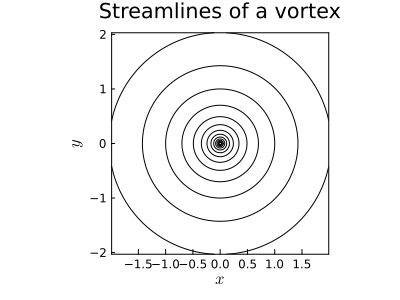

In [16]:
ViscousFlow.streamfunction!(ψ,v,cache)
p = plot(ψ,cache,color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a vortex")

### Another singularity: a dipole (or doublet)
A doublet is also a singularity, but higher order than the source and vortex. It has the form

$$ u_r = -\dfrac{D}{\pi r^2} \cos(\theta-\alpha),\quad u_\theta = -\dfrac{D}{\pi r^2} \sin(\theta-\alpha), \qquad \psi = -\dfrac{D}{\pi r} \sin(\theta-\alpha), \qquad \phi = \dfrac{D}{\pi r} \cos(\theta-\alpha) $$

$D$ is the strength and $\alpha$ the angle. Notice that it has both a $u_r$ and a $u_\theta$
component of velocity, and has a different dependence on $r$. It decays faster with distance
away from the center.

Let's create a doublet of strength 1 at angle $\pi/4$:

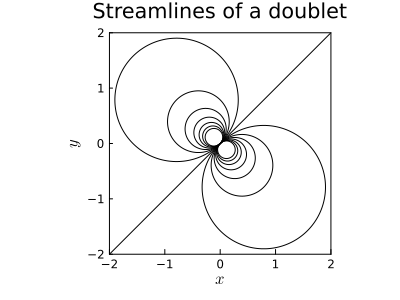

In [17]:
zd = 0.0+im*0.0
D = 1.0
α = π/4
d = Doublets.Doublet(zd,D*exp(im*α))


ViscousFlow.streamfunction!(ψ,d,cache)
p = plot(ψ,cache,xlim=(-2,2),ylim=(-2,2),levels=range(-1,1,length=15),color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a doublet")

### A corner flow
A corner flow is a flow in a sector of interior angle $\nu\pi$. It is generated by the
streamfunction

$$ \psi(r,\theta) = \nu \sigma r^{1/\nu} \cos((\theta-\alpha)/\nu)$$

The strength is $\sigma$ and the rotation angle of the corner is $\alpha$.

Create a corner flow of strength 1 and interior angle $\pi/3$ (60 degrees).

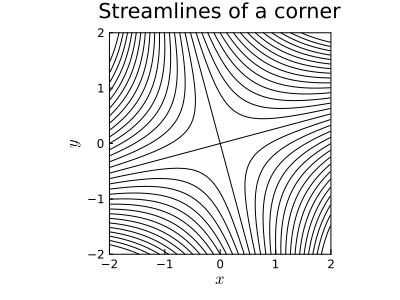

In [18]:
ν = 0.5
σ = 1.0
α = π/3
c = Corner(σ,ν,α)

ViscousFlow.streamfunction!(ψ,c,cache)
p = plot(ψ,cache,xlim=(-2,2),ylim=(-2,2),levels=range(-3,3,length=31),color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a corner")

Note the straight streamlines that cross at the origin. There is a stagnation point there.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*